<center>
<a href="https://colab.research.google.com/github/wladrod/Aprendizaje-Automatico-2023/blob/master/notebooks/11-PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</center>

<center>
    <h1>Aprendizaje Automátic</h1>
    <h1>PyTorch</h1>
    <br>
    <h5>Prof. Wladimir Rodríguez</h5>
    <h5>wladimir@ula.ve</h5>
    <h5>Departamento de Computación</h5>
</center>

<img src='../figuras/PyTorch.png' width=75%/>

# ¿Qué es [PyTorch](www.pytorch.org)?

PyTorch es una librería de código abierto del lenguaje Python, desarrollada por Facebook en 2016 para ser usada en el ámbito del aprendizaje automático.

A los investigadores de aprendizaje automático les encanta usar PyTorch. Y a partir de febrero de 2022, PyTorch es la libreria de aprendizaje profundo más utilizado en [Papers With Code](https://paperswithcode.com/trends), un sitio web que realizar un seguimiento de los trabajos de investigación de aprendizaje automático y los repositorios de código adjuntos.

PyTorch también ayuda a encargarse de muchas cosas, como la aceleración de GPU (haciendo que su código se ejecute más rápido) detrás de escena.

Así que puedes concentrarte en manipular datos y escribir algoritmos y PyTorch se asegurará de que funcione rápido.

## Tensores
Al igual que un vector puede considerarse como una matriz, o una lista, de escalares (números ordinarios como 1, 2 y PI), y las matrices pueden considerarse matrices de vectores, un tensor puede considerarse como un matriz de matrices. Entonces un tensor es realmente solo una matriz n-dimensional. Resulta, como veremos en los ejemplos de codificación, que esta arquitectura tiene mucho sentido cuando se trabaja con el aprendizaje automático.

En TensorFlow, los tensores se describen mediante una unidad de dimensionalidad conocida como orden. El orden de Tensor no es lo mismo que el orden de la matriz. El orden del tensor es el número de dimensiones del tensor.

Un tensor de orden dos es lo que típicamente pensamos como una matriz, un tensor de orden uno es un vector. Para un tensor de orden dos, puede acceder a cualquier elemento con la sintaxis `t[i, j]`. Para un tensor de orden tres, los elementos de direccionan con `t[i, j, k]`.

<img src='../figuras/tensor_rank.png' width=75%/>

Los tensores son similares a los `ndarrays` de NumPy, con la adición de que los tensores también se pueden usar en una GPU para acelerar la computaciȯn.


In [3]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from time import time
%matplotlib inline
torch.__version__

'1.12.1'

Construya una matriz de 5x3, sin inicializar:

In [17]:
x = torch.empty(5, 3)
x

tensor([[1.1210e-44, 0.0000e+00, 2.1019e-44],
        [0.0000e+00, 3.8384e-41, 2.8026e-45],
        [0.0000e+00, 0.0000e+00, 2.1019e-44],
        [0.0000e+00, 4.0897e-41, 0.0000e+00],
        [3.5584e+19, 1.4013e-45, 2.1019e-44]])

Construya una matriz inicializada al azar:

In [18]:
x = torch.rand(5, 3)
x

tensor([[0.6144, 0.6569, 0.6571],
        [0.8377, 0.8562, 0.6570],
        [0.8439, 0.5591, 0.1283],
        [0.1261, 0.0950, 0.0736],
        [0.9960, 0.5408, 0.1851]])

Construya una matriz llena de ceros y de `dtype long`:

In [19]:
x = torch.zeros(5, 3, dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

Construya un tensor directamente de los datos:

In [20]:
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

o crear un tensor basado en un tensor existente. Estos métodos reutilizarán las propiedades del tensor de entrada, a menos que el usuario proporcione nuevos valores

In [21]:
x = x.new_ones(5, 3, dtype=torch.double)    # los métodos new_* toman tamaños
print(x)
x = torch.rand_like(x, dtype=torch.float)   # cambiar dtype!
x                                           # el resultado tiene el mismo tamaño

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


tensor([[0.9706, 0.8255, 0.2703],
        [0.9891, 0.8650, 0.9366],
        [0.2873, 0.4530, 0.5338],
        [0.1202, 0.5840, 0.0107],
        [0.6551, 0.7522, 0.0894]])

Obtener su tamaño:

In [22]:
x.size()

torch.Size([5, 3])

Nota

> `torch.Size` es de hecho una tupla, por lo que admite todas las operaciones de tupla.

### Operaciones

Existen múltiples sintaxis para las operaciones. En el siguiente ejemplo, veremos la operación de adición.

Adición: sintaxis 1

In [23]:
y = torch.rand(5, 3)
x + y

tensor([[1.4083, 1.8022, 0.9206],
        [1.1800, 1.1101, 1.6890],
        [1.1264, 1.4018, 0.6821],
        [0.6555, 1.3994, 0.0509],
        [0.7434, 1.0376, 0.3307]])

Adición: sintaxis 2

In [24]:
torch.add(x, y)

tensor([[1.4083, 1.8022, 0.9206],
        [1.1800, 1.1101, 1.6890],
        [1.1264, 1.4018, 0.6821],
        [0.6555, 1.3994, 0.0509],
        [0.7434, 1.0376, 0.3307]])

Adición: proporcionar un tensor de salida como argumento

In [25]:
resultado = torch.empty(5, 3)
torch.add(x, y, out=resultado)
resultado

tensor([[1.4083, 1.8022, 0.9206],
        [1.1800, 1.1101, 1.6890],
        [1.1264, 1.4018, 0.6821],
        [0.6555, 1.3994, 0.0509],
        [0.7434, 1.0376, 0.3307]])

Adición: en sitio

In [26]:
y.add_(x)
y

tensor([[1.4083, 1.8022, 0.9206],
        [1.1800, 1.1101, 1.6890],
        [1.1264, 1.4018, 0.6821],
        [0.6555, 1.3994, 0.0509],
        [0.7434, 1.0376, 0.3307]])

Nota

> Cualquier operación que cambie un tensor en el lugar se le coloca el postfijo \_. Por ejemplo: *x.copy_(y)*, *x.t_()*, cambiará *x*.

¡Puede usar la indexación NumPy estándar!

In [27]:
x[:, 1]

tensor([0.8255, 0.8650, 0.4530, 0.5840, 0.7522])

Cambio de tamaño: si desea cambiar el tamaño / remodelar el tensor, puede usar `torch.view`:

In [28]:
x = torch.rand(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


Si tiene un tensor de un elemento, use `.item()` para obtener el valor como un número de Python

In [29]:
x = torch.randn(1)
print(x)
x.item()

tensor([0.2538])


0.253837525844574

Leer mas tarde:

> [Aquí](https://pytorch.org/docs/stable/torch.html) se describen más de 100 operaciones de tensor, que incluyen transposición, indexación, corte, operaciones matemáticas, álgebra lineal, números aleatorios, etc.

### Puente NumPy

Convertir un Tensor Torch en una matriz NumPy y viceversa es muy fácil.

El Tensor Torch y la matriz NumPy compartirán sus ubicaciones de memoria subyacentes (si el Tensor Torch está en la CPU), y cambiar una cambiará la otra.
### Convertir un Tensor Torch en una matriz NumPy

In [30]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [31]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

Vea cómo la matriz numpy cambió de valor.

In [32]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [33]:
b = b + 1
print(b)
print(a)

[3. 3. 3. 3. 3.]
tensor([2., 2., 2., 2., 2.])


### Conversión de matriz NumPy a Tensor Torch

Vea cómo cambiar la matriz NumPy cambió el Tensor Torch automáticamente

In [34]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


Todos los tensores en la CPU excepto un `CharTensor` admiten la conversión a NumPy y viceversa.

### Tensores CUDA

Los tensores se pueden mover a cualquier dispositivo utilizando el método `.to`.

In [38]:
# ejecutemos esta celda solo si CUDA está disponible
# Usaremos objetos ``torch.device`` para mover los tensores dentro y fuera de la GPU
if torch.backends.mps.is_available():
    dispositivo = torch.device("mps")          # un objeto dispositivo CUDA
    y = torch.ones_like(x, device=dispositivo)  # crear directamente un tensor en la GPU
    x = x.to(dispositivo)                       # o usar la cadena ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.float32)) 

tensor([1.2538], device='mps:0')
tensor([1.2538])


## Un problema de regresión simple

Vamos a comenzar a utilizar `PyTorch` con un problema sencillo de regresión lineal con una sola característica $x$. 

$$y = a +bx + \epsilon$$

## Generacion de datos

Comencemos generando algunos datos sintéticos: comenzamos con un vector de 100 puntos para nuestra característica $x$ y creamos nuestras etiquetas usando $a = 1$, $b = 2$ y algo de ruido gaussiano.

A continuación, dividamos nuestros datos sintéticos en conjuntos de entrenamiento y validación, barajando la matriz de índices y utilizando los primeros 80 puntos barajados para el entrenamiento.

In [39]:
# Generación de Datos
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

# Barajar los indices
indices = np.arange(100)
np.random.shuffle(indices)

# Usar los primeros 80 indices aleatorios para entrenamiento
indices_entrenamiento = indices[:80]
# Usar los indices restantes para validación
indices_validacion = indices[80:]

# Generar conjuntos de entrenamiento y validación
x_entrenamiento, y_entrenamiento = x[indices_entrenamiento], y[indices_entrenamiento]
x_validacion, y_validacion = x[indices_validacion], y[indices_validacion]

## Visualización de los conjuntos de datos

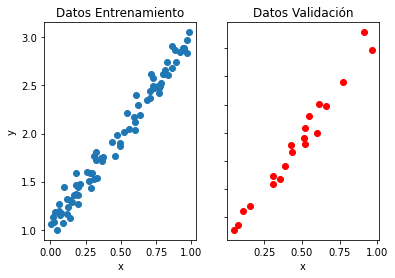

In [40]:
figura, axs = plt.subplots(1, 2)
axs[0].scatter(x_entrenamiento, y_entrenamiento)
axs[0].set(xlabel='x', ylabel='y')
axs[0].set_title('Datos Entrenamiento')
axs[1].scatter(x_validacion, y_validacion, c='red')
axs[1].set(xlabel='x', ylabel='y')
axs[1].set_title('Datos Validación')
for ax in axs.flat:
    ax.label_outer()

### Cargando datos, dispositivos y CUDA

Para convertir las matrices Numpy a tensores Pytorch usaremos `from_numpy`. Sin embargo, este método devuelve un tensor de CPU.

Si queremos utilizar la GPU podemos usar el método `to()`. Envía un tensor a cualquier dispositivo que especifique, incluida la GPU (denominada `cuda` o `cuda:0`).

Para hacer que el código use la CPU en caso de que no tengamos disponible una GPU se puede usar `cuda.is_available()` para averiguar si tiene una GPU a su disposición y configura tu dispositivo en consecuencia.

También puede convertirlo fácilmente a una precisión menor (flotante de 32 bits) utilizando `float()`.

In [41]:
dispositivo = 'mps' if torch.backends.mps.is_available() else 'cpu'

# Nuestros datos estaban en matrices Numpy, pero tenemos que transformarlos en los tensores de PyTorch
# y luego los enviamos al dispositivo elegido
x_entrenamiento_tensor = torch.from_numpy(x_entrenamiento).float().to(dispositivo)
y_entrenamiento_tensor = torch.from_numpy(y_entrenamiento).float().to(dispositivo)

x_validacion_tensor = torch.from_numpy(x_validacion).float().to(dispositivo)
y_validacion_tensor = torch.from_numpy(y_validacion).float().to(dispositivo)
# Aquí podemos ver la diferencia: observe que .type() es más útil
# ya que también nos dice DÓNDE está el tensor (device)
print(type(x_entrenamiento), type(x_entrenamiento_tensor), x_entrenamiento_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.mps.FloatTensor


Si comparamos los tipos de ambas variables, obtendrá lo que esperaría: `numpy.ndarray` para la primera y `torch.Tensor` para la segunda.

El tipo de dato de un tensor de GPU sería `torch.cuda.FloatTensor`.

También podemos dar la vuelta, volviendo los tensores a matrices Numpy, usando `numpy()`. Debería ser fácil como `x_train_tensor.numpy()` pero ...

> TypeError: no se puede convertir el tensor CUDA en numpy. Use `Tensor.cpu()` para copiar primero el tensor a la memoria del host.

Desafortunadamente, Numpy no puede manejar los tensores de GPU ... primero debe hacer que sean tensores de CPU usando `cpu()`.

### Creando Parámetros

¿Qué distingue un tensor utilizado para datos, como los que acabamos de crear, de un tensor utilizado como parámetro / peso (entrenable)?

Los últimos tensores requieren el cálculo de sus gradientes, por lo que podemos actualizar sus valores (los valores de los parámetros, es decir). Para eso es necesario el argumento `require_grad = True`. Le dice a PyTorch que queremos que calcule gradientes para nosotros.

In [42]:
torch.manual_seed(42)
#Podemos crear tensores regulares y enviarlos al dispositivo (como hicimos con nuestros datos)
a = torch.randn(1, dtype=torch.float).to(dispositivo)
b = torch.randn(1, dtype=torch.float).to(dispositivo)
# y ENTONCES los fijamos como que requieren gradientes ...
a.requires_grad_()
b.requires_grad_()
print(a, b)

tensor([0.3367], device='mps:0', requires_grad=True) tensor([0.1288], device='mps:0', requires_grad=True)


Primero enviamos nuestros tensores al dispositivo y luego usamos el método `require_grad_()` para establecer su require_grad en True en su lugar.
  
> tensor(\[0.3367\], device='cuda:0', requires_grad=True)  
> tensor(\[0.1288\], device='cuda:0', requires_grad=True)

*En PyTorch, cada método que termina con un guión bajo (_) realiza cambios in situ, lo que significa que modificarán la variable subyacente.*

Aunque el último enfoque funcionó bien, es mucho mejor asignar tensores a un dispositivo en el momento de su creación.

In [43]:
# Podemos especificar el dispositivo en el momento de la creación. ¡RECOMENDADO!
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=dispositivo)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=dispositivo)
print(a, b)

tensor([1.5066], device='mps:0', requires_grad=True) tensor([-0.5592], device='mps:0', requires_grad=True)


### Autograd

Autograd es el paquete de diferenciación automática de PyTorch. Gracias a ello, no necesitamos preocuparnos por las derivadas parciales, regla de la cadena ni nada por el estilo.

Entonces, ¿cómo le decimos a PyTorch que haga lo suyo y calcule todos los gradientes? Para eso sirve el método `backward()`.

¿Recuerdas el punto de partida para calcular los gradientes? Fue la función de pérdida, ya que calculamos sus derivadas parciales con respecto a nuestros parámetros. Por lo tanto, debemos invocar el método `backward()` desde la variable Python correspondiente, como `perdida.backward()`.

¿Qué pasa con los valores reales de los gradientes? Podemos inspeccionarlos mirando el atributo `grad` de un tensor.

Si revisa la documentación del método, indica claramente que los gradientes se acumulan. Entonces, cada vez que usamos los gradientes para actualizar los parámetros, necesitamos poner a cero los gradientes después. Y para eso sirve `zero_grad()`.

Entonces, abandonemos el cálculo manual de gradientes y usemos los métodos `backward()` y `zero_grad()` en su lugar.


### Optimizador

Utilizamos uno de los [optimizadores de PyTorch](https://pytorch.org/docs/stable/optim.html), como SGD o Adam.

Un optimizador toma los parámetros que queremos actualizar, la tasa de aprendizaje que queremos usar (¡y posiblemente muchos otros hiperparámetros también!) Y realiza las actualizaciones a través de su método `step()`.

Además, ya no necesitamos poner a cero los gradientes uno por uno. ¡Solo invocamos el método `zero_grad()` del optimizador y eso es todo!

*No se deje engañar por el nombre del optimizador: si utilizamos todos los datos de entrenamiento a la vez para la actualización, como lo estamos haciendo en el código, el optimizador está realizando un descenso de gradiente por lotes, a pesar de su nombre.*

### Pérdida

Ahora abordamos el cálculo de pérdidas. Como se esperaba, PyTorch nos cubrió una vez más. Hay muchas [funciones de pérdida](https://pytorch.org/docs/stable/nn.html#loss-functions) para elegir, dependiendo de la tarea en cuestión. Como el nuestro es una regresión, estamos utilizando la pérdida del error cuadrático medio (MSE).

*Tenga en cuenta que* `nn.MSELoss` *en realidad crea una función de pérdida para nosotros, NO es la función de pérdida en sí. Además, puede especificar un método de reducción para aplicar, es decir, cómo desea agregar los resultados para puntos individuales: puede promediarlos `(reduction='mean')` o simplemente sumarlos `(reduction='sum')`*.

Luego usamos la función de pérdida creada más adelante, para calcular la pérdida dadas nuestras predicciones y nuestras etiquetas.

### Modelo

En PyTorch, un modelo está representado por una clase normal de Python que hereda de la clase `Module`.

Los métodos más fundamentales que necesita implementar son:

- `__init __(self)`: define las partes que componen el modelo, en nuestro caso, dos parámetros, $a$ y $b$.

>Sin embargo, no está limitado a definir parámetros ... los modelos también pueden contener otros modelos (o capas) como sus atributos, por lo que puede anidarlos fácilmente. Veremos un ejemplo de esto en breve también.

- `forward(self, x)`: realiza el cálculo real, es decir, genera una predicción, dada la entrada x.

>Sin embargo, NO debe llamar al método `forward(x)`. Debe llamar a todo el modelo en sí, como en el `modelo(x)` para realizar un pase hacia adelante y predecir la salida.

Construyamos un modelo adecuado (pero simple) para nuestra tarea de regresión. Debe tener un aspecto como este:

In [44]:
class RegresionLinealManual(nn.Module):
    def __init__(self):
        super().__init__()
        # Para hacer que "a" y "b" sean parámetros reales del modelo, necesitamos envolverlos con nn.Parameter
        self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x):
        # Calcula las salidas / predicciones
        return self.a + self.b * x

En el método `__init__`, definimos nuestros dos parámetros, $a$ y $b$, usando la clase `Parameter()`, para decirle a PyTorch que estos tensores deben considerarse parámetros del modelo del que son un atributo.

¿Por qué debería importarnos eso? Al hacerlo, podemos usar el método `parameter()` de nuestro modelo para recuperar un iterador sobre todos los parámetros del modelo, incluso aquellos parámetros de modelos anidados, que podemos usar para alimentar nuestro optimizador (¡en lugar de crear una lista de parámetros nosotros mismos!).

Además, podemos obtener los valores actuales para todos los parámetros utilizando el método `state_dict()` de nuestro modelo.

>IMPORTANTE: necesitamos enviar nuestro modelo al mismo dispositivo donde están los datos. Si nuestros datos están hechos de tensores de GPU, nuestro modelo también debe "vivir" dentro de la GPU.

Podemos usar todos estos útiles métodos  para cambiar nuestro código, que debería verse así:

In [46]:
torch.manual_seed(42)

# Crear lista vacias para guardar los valores de las perdidas
perdidas_entrenamiento = []
perdidas_prueba = []
conteo_epocas = []

# Ahora podemos crear un modelo y enviarlo de inmediato al dispositivo
modelo_0 = RegresionLinealManual().to(dispositivo)
# También podemos inspeccionar sus parámetros usando su state_dict
print(modelo_0.state_dict())

# Fijar hiperparámetros
tasa_aprendizaje = 1e-1
n_epocas = 200

# Definir la función de perdida
perdida_fn = nn.MSELoss(reduction='mean')

#Defimir el optimizador a utilizar
optimizador = optim.SGD(modelo_0.parameters(), lr=tasa_aprendizaje)

for epoca in range(n_epocas + 1):
    ### Entrenamiento
    
    # Poner el modelo en modo de entrenamiento (este es el estado predeterminado de un modelo)
    modelo_0.train()

    # 1. Propagar hacia adelante los datos de entrenamiento usando el método forward() dentro
    y_sombrero = modelo_0(x_entrenamiento_tensor)

    # 2. Calcule la pérdida (qué tan diferentes son las predicciones de nuestros modelos con respecto a la verdad del terreno)
    perdida = perdida_fn(y_entrenamiento_tensor, y_sombrero)

    # 3. Cero los gradientes del optimizador
    optimizador.zero_grad()

    # 4. Propagación hacia atrás
    perdida.backward()

    # 5. Realizar paso de optimización
    optimizador.step()

    ### Prueba

    # Colocar el modelo en modo evaluación
    modelo_0.eval()

    with torch.inference_mode():
        # 1. Propagar hacia adelante los datos de prueba
        prediccion_prueba = modelo_0(x_validacion_tensor)
        
        # 2. Calcular la perdida sobre la data de prueba
        perdida_prueba = perdida_fn(prediccion_prueba, y_validacion_tensor)
        
        conteo_epocas.append(epoca)
        perdidas_entrenamiento.append(perdida.cpu().numpy())
        perdidas_prueba.append(perdida_prueba.cpu().numpy())
        
        # Imprimir las perdidas cada 10 epocas
        if epoca % 10 == 0:
            print(f"Epoca: {epoca} | MSE Perdida Entrenamiento: {perdida:.4f} | MSE Perdida Prueba: {perdida_prueba:.4f} ")
    
print(modelo_0.state_dict())

OrderedDict([('a', tensor([0.3367], device='mps:0')), ('b', tensor([0.1288], device='mps:0'))])
Epoca: 0 | MSE Perdida Entrenamiento: 2.7475 | MSE Perdida Prueba: 1.3556 
Epoca: 10 | MSE Perdida Entrenamiento: 0.1146 | MSE Perdida Prueba: 0.0593 
Epoca: 20 | MSE Perdida Entrenamiento: 0.0803 | MSE Perdida Prueba: 0.0482 
Epoca: 30 | MSE Perdida Entrenamiento: 0.0613 | MSE Perdida Prueba: 0.0372 
Epoca: 40 | MSE Perdida Entrenamiento: 0.0473 | MSE Perdida Prueba: 0.0289 
Epoca: 50 | MSE Perdida Entrenamiento: 0.0370 | MSE Perdida Prueba: 0.0229 
Epoca: 60 | MSE Perdida Entrenamiento: 0.0294 | MSE Perdida Prueba: 0.0185 
Epoca: 70 | MSE Perdida Entrenamiento: 0.0238 | MSE Perdida Prueba: 0.0154 
Epoca: 80 | MSE Perdida Entrenamiento: 0.0197 | MSE Perdida Prueba: 0.0132 
Epoca: 90 | MSE Perdida Entrenamiento: 0.0166 | MSE Perdida Prueba: 0.0116 
Epoca: 100 | MSE Perdida Entrenamiento: 0.0144 | MSE Perdida Prueba: 0.0105 
Epoca: 110 | MSE Perdida Entrenamiento: 0.0127 | MSE Perdida Prueba:

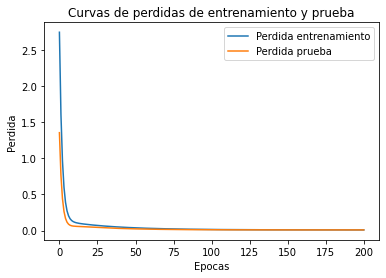

In [47]:
# Graficar las curvas de perdidas
plt.plot(conteo_epocas, perdidas_entrenamiento, label="Perdida entrenamiento")
plt.plot(conteo_epocas, perdidas_prueba, label="Perdida prueba")
plt.title("Curvas de perdidas de entrenamiento y prueba")
plt.ylabel("Perdida")
plt.xlabel("Epocas")
plt.legend();